In [1]:
using DifferentialEquations, CUDA

In [2]:
using Fields

# Parameters

In [3]:
L = 2
N = 128
tmax = 1.125
;

In [4]:
dx = L/(N-1)
x = 0.0:dx:L
t = 0.0:dx/10:tmax
x₀ = L/2
;

# Initial conditions + allocs.

In [5]:
φ₀   = zero(x)
∂ₜφ₀ = ∂ₜoscillon.(0, x .- x₀)
uₕₒₛₜ = cat(φ₀, ∂ₜφ₀; dims=1)
u₀ = CuArray(uₕₒₛₜ)

∇²ϕ  = CuArray(zero(x))

;

# Problem + solution

In [6]:
prob = ODEProblem(signumGordon!, u₀, (0.0, tmax), (N, dx, ∇²ϕ))

@time sol = solve(prob, RK4(); adaptive=false, dt=dx / 10)

 17.022736 seconds (27.55 M allocations: 1.837 GiB, 5.03% gc time, 0.18% compilation time)


retcode: Success
Interpolation: 3rd order Hermite
t: 716-element Vector{Float64}:
 0.0
 0.0015748031496062992
 0.0031496062992125984
 0.004724409448818898
 0.006299212598425197
 0.007874015748031496
 0.009448818897637795
 0.011023622047244094
 0.012598425196850394
 0.014173228346456693
 ⋮
 1.1133858267716663
 1.1149606299212727
 1.116535433070879
 1.1181102362204853
 1.1196850393700917
 1.121259842519698
 1.1228346456693044
 1.1244094488189107
 1.125
u: 716-element Vector{CuArray{Float64, 1, CUDA.Mem.DeviceBuffer}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -0.1417322834645669, -0.12598425196850394, -0.11023622047244097, -0.09448818897637801, -0.07874015748031493, -0.06299212598425197, -0.047244094488189003, -0.03149606299212604, -0.015748031496062964, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -0.14041994750656164, -0.12467191601049868, -0.10892388451443571, -0.09317585301837275, -0.07742782152230969, -0.06167979002624672, -0.045931758530183754, -0.030183

# Plots

In [7]:
using Plots; gr()

Plots.GRBackend()

### Organize data

In [8]:
copyto!(uₕₒₛₜ, sol.u[end])
uₗₐₛₜ = reduce(hcat, uₕₒₛₜ)
φ  = transpose(uₗₐₛₜ[1:N])
φₜ = transpose(uₗₐₛₜ[N+1:2N])

M = size(sol.u)[1]
uₐₗₗ = [zeros(Float64, 2N) for _ in 1:M]
copyto!(uₐₗₗ, sol.u)
uₐₗₗ = transpose(reduce(hcat, uₐₗₗ))
ϕ  = uₐₗₗ[:, 1:end÷2]
ϕₜ = uₐₗₗ[:, (end÷2+1):end]

;

### Heatmap

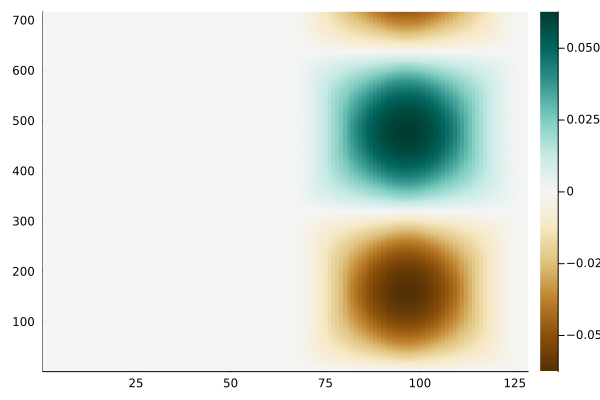

In [9]:
heatmap(ϕ, colormap=:BrBG_11)

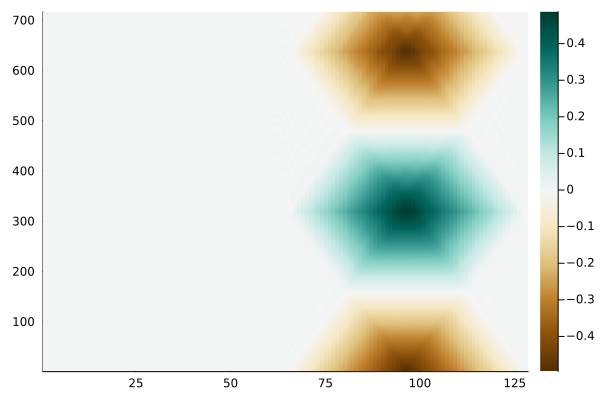

In [10]:
heatmap(ϕₜ, colormap=:BrBG_11)

### Surface

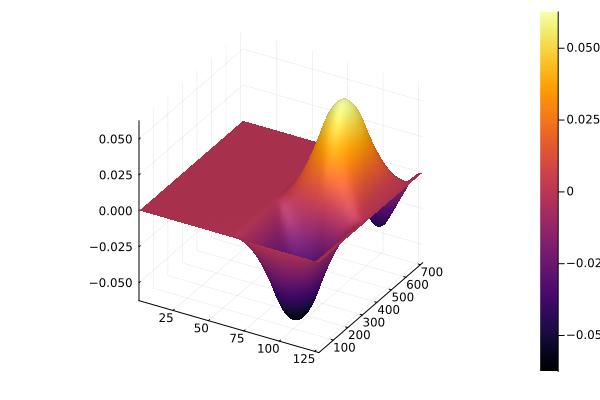

In [11]:
plot(ϕ,st=:surface;)

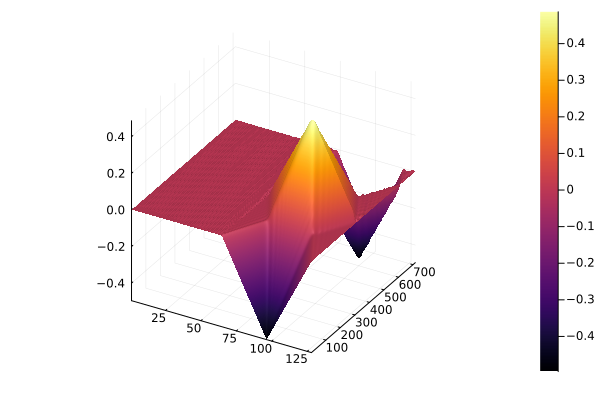

In [12]:
plot(ϕₜ,st=:surface;)

### Time series

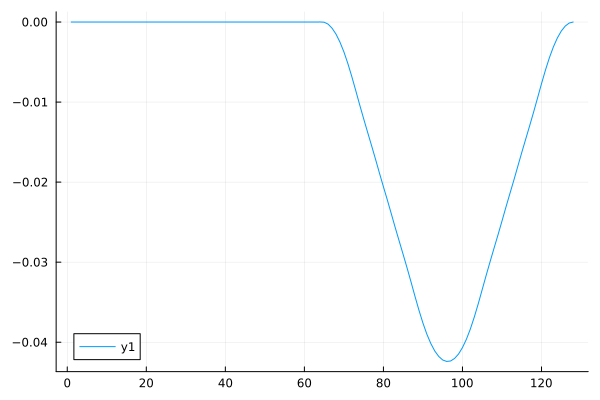

In [13]:
plot(ϕ[250,:])